In [1]:
### Load model mechanisms

In [2]:
modelPath = 'Models/OConnor2012'
modelName = 'OConnor2012'

def getSomaScript(h):
    
    h("objref p")
    h("p = new PythonObject()")
    
    h.load_file('Cell1.hoc')

    # Disable synapses and clear existing stim
    h.p.cell = h.Cell1("","Cell1","")
    
    return h.p.cell.soma

### Create a NeuronUnit model

In [3]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

mod1.setIntegrationMethod("variable")

# Interactively find stimulation currents
#helpers.IClampWidget(mod1)

In [4]:
helpers.IClampWidget(mod1)

The installed widget Javascript is the wrong version.


In [5]:
from quantities import nA, s, ms

# Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude':  -0.3*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     2*nA, 'delay': 0.5*s, 'duration': 2*ms}
i_thresh =  {'amplitude':  .6*nA, 'delay': 0.5*s, 'duration': 1000*ms}

### Define tests to run

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -67.9878690904 mV, Z: -0.428469424412 SDs


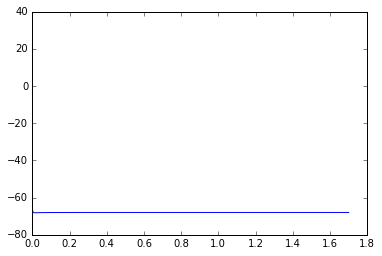

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -67.9878690904 mV, Z: -0.428469424412 SDs


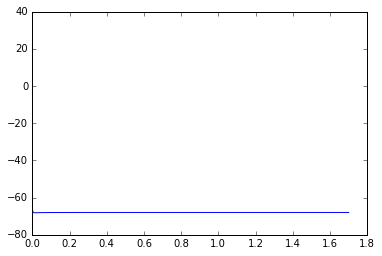

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 29999672.8481 kg*m**2/(s**3*A**2), Z: -0.60774659308 SDs


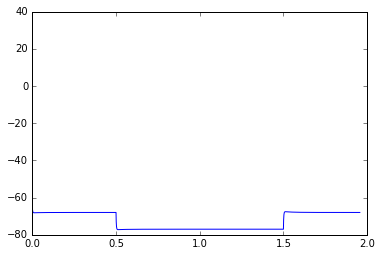

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 9.72041915226 ms, Z: -0.27493831865 SDs


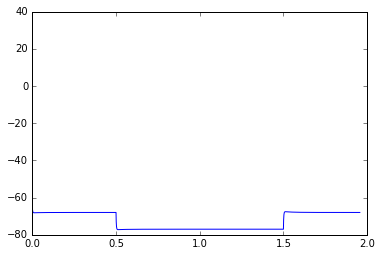

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 5.0625 ms, Z: 3.69114173066 SDs


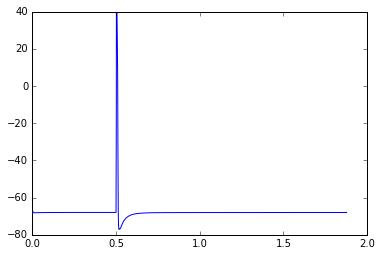

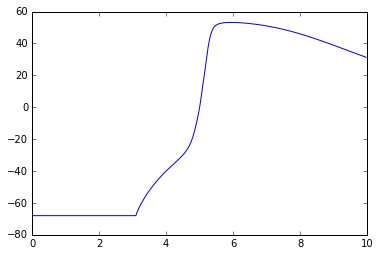

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -45.5090231248 mV, Z: -0.19203678507 SDs


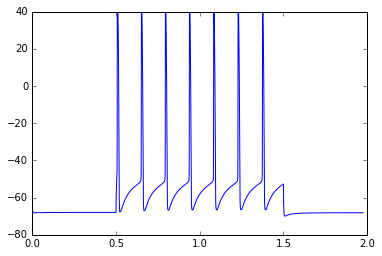

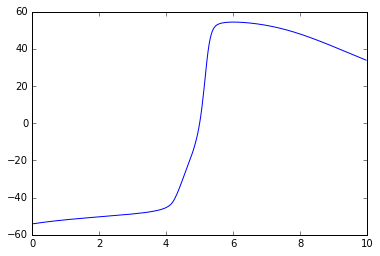

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 97.8758585355 mV, Z: 0.577067394081 SDs


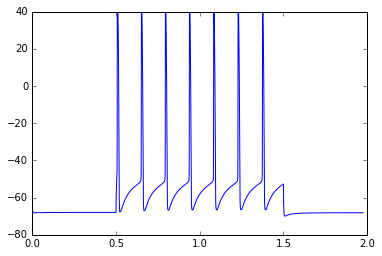

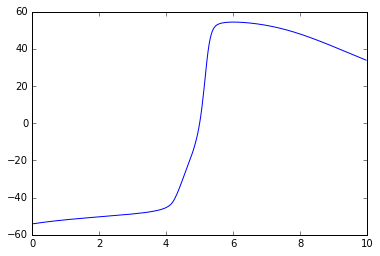

In [6]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

results = helpers.runAllTests(tests,mod1)

54.363858639 mV
-67.9876947974 mV
61.1757767182 mV
291


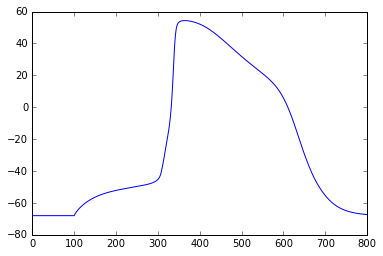

In [32]:
# AP width computed manually, as the AP window is too small for such wide AP
pot = mod1.get_membrane_potential()[15900:16700]

import matplotlib.pyplot as g
g.plot(pot)
#g.xlim([15900,16700])

print(max(pot))
print(min(pot))
print((max(pot)-min(pot))/2)
halfw = (max(pot)-min(pot))/2
print(sum(pot>halfw+min(pot)))
results[modelName]['Injected current AP width test'] = mod1.fixedTimeStep*sum(pot>halfw+min(pot))*ms

In [ ]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())
mod1.h.quit()

{'OConnor2012': {'Injected current AP amplitude test': array(97.87585853549932) * mV,
                 'Injected current AP threshold test': array(-45.50902312484161) * mV,
                 'Injected current AP width test': array(9.09375) * ms,
                 'Input resistance test': array(29999672.848123327) * kg*m**2/(s**3*A**2),
                 'Resting potential test': array(-67.98786909037142) * mV,
                 'Time constant test': array(9.720419152257644) * ms}}
{'BhallaBower1993': {'Injected current AP amplitude test': array(71.32715773727804) * mV,
                     'Injected current AP threshold test': array(-40.35042798167796) * mV,
                     'Injected current AP width test': array(0.5333333333333333) * ms,
                     'Input resistance test': array(51778384.93506186) * kg*m**2/(s**3*A**2),
                     'Resting potential test': array(-65.83856328513072) * mV,
                     'Time constant test': array(43.997403548975335) * ms},
 